This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

#path2Create = r'C:\rezaul\1.academic\1.research\2.project\mrb\paper\paperOne\fig\'
path2Create = os.path.join(r"C:/rezaul/1.academic/1.research/2.project/mrb/paper/paperOne/fig/")

    
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/paper/paperOne/fig/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=600):
    
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package

#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader

In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

In [7]:
# SET TIME AXIS
#=================================================
'''

# time: 62415 days = 171 years, 2052 months
time=np.linspace(1930,2101,62415) # years since 1930-01-01
days = np.arange(1,62416,1) # days since 1930-01-01
months = np.linspace(1930,2101,2052) # months since 1930-01-01
years = np.arange(1930,2101,1)
'''

'\n\n# time: 62415 days = 171 years, 2052 months\ntime=np.linspace(1930,2101,62415) # years since 1930-01-01\ndays = np.arange(1,62416,1) # days since 1930-01-01\nmonths = np.linspace(1930,2101,2052) # months since 1930-01-01\nyears = np.arange(1930,2101,1)\n'

## Basin shape files

In [8]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'
shapeFile_LowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/received/sophia/Subcatchments_Mississippi/Subcatchments/lowerMRB.shp'

shapeFile_Missi_Trunk = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_trunk_1.shp'


In [9]:
shapeFile_MissiWri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/basin/Shapefiles_Rhine_Mississippi_basin/wribasin.shp'


## Basin Masks

In [10]:
MaskFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mask_arkansas_CESM.nc' #Change if needed
MaskFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mask_missouri_CESM.nc' #Change if needed
MaskFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mask_ohio_CESM.nc' #Change if needed
MaskFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mask_missi_CESM.nc' #Change if needed


## Masking

In [11]:
def GetMask2D(Lat,Lon,CreatMask,MaskFile,feature,coordinate):
    """
    Lat and Lon: DataArray - lat and lon from the data to be masked
    The fist-time run should set CreatMask as True!!!
    MaskFile: file path of the maskfile
    feature: shaperecords from shapefile (Usually can get the following code)
            shape = shapefile.Reader(shpfile)
            feature = shape.shapeRecords()[id]

    coordinates: 0 when the map to mask is in lon(0,360) but shapefile's feature is in lon(-180,0)
            1 when the map to mask is in lon(-180,180) but shapefile's feature is in lon(180,360)
            2 when 0 and 1 are not the case
    """
    if CreatMask:
        print('This may take some time...')
        Mask = xr.DataArray(np.zeros((len(Lat),len(Lon)),dtype=int), coords=[Lat, Lon], dims=[Lat.dims[0],Lon.dims[0]])
        first = feature.shape.__geo_interface__ 
        # change the coordinate (londitude) to match the shapefile with the data to be masked
        if coordinate==0:
            coordi = np.array(first['coordinates'][0])
            coordi[:,0] = coordi[:,0]+360
            coordi_final = coordi.tolist()
        if  coordinate==1:
            coordi = np.array(first['coordinates'][0])
            coordi[:,0] = coordi[:,0]-360
            coordi_final = coordi.tolist()
        if coordinate ==2:
            coordi_final = first['coordinates'][0]
        
        from shapely.geometry import Point, Polygon
        poly = Polygon(coordi_final)
        
        for ilat,lat in enumerate(Lat):
            for ilon,lon in enumerate(Lon):
                if Point(lon,lat).within(poly):
                    Mask[ilat,ilon]=1
                else:
                    Mask[ilat,ilon]=0
        ds=xr.Dataset({'Mask': Mask}) 
        ds.to_netcdf(MaskFile)
   
    MASK = xr.open_dataset(MaskFile)['Mask']

    return MASK

In [12]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)
sf_LowMissi = shp.Reader(shapeFile_LowMissi)


In [13]:
sf_MissiWri = shp.Reader(shapeFile_MissiWri)
print(sf_MissiWri)


shapefile Reader
    254 shapes (type 'POLYGON')
    254 records (16 fields)


In [14]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#
reader_Missi_Trunk = shpreader.Reader(shapeFile_Missi_Trunk)
basin_Missi_Trunk = list(reader_Missi_Trunk.geometries())
#



In [15]:
reader_MissiWri = shpreader.Reader(shapeFile_MissiWri)
basin_MissiWri = list(reader_MissiWri.geometries())
print(basin_MissiWri)
#

[<shapely.geometry.polygon.Polygon object at 0x000001D10CB68F10>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB68B20>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB68F40>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB68520>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB68880>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB68F70>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5EAC0>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5ED90>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5E850>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5EAF0>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5E3A0>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5EA60>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5E970>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5E670>, <shapely.geometry.polygon.Polygon object at 0x000001D10CB5E550>, <shapely.geometry.polygo

In [16]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)

feature_LowMissi = sf_LowMissi.shapeRecords()[0]
print(feature_LowMissi)


In [17]:
feature_MissiWri = sf_MissiWri.shapeRecords()[45]
print(feature_MissiWri)

## Read Nc file

In [18]:
#filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip'
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc'

ncFile_param = str(filePath) + '/' + str(fileName)
print(ncFile_param)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc


In [19]:
file_param = Dataset(ncFile_param, mode='r')
file_param

lons = file_param.variables['lon'][:]
lats = file_param.variables['lat'][:]

In [20]:
print(lats[0:4])
print(lons[0:4])

[-90.         -89.05759162 -88.11518325 -87.17277487]
[0.   1.25 2.5  3.75]


In [21]:
file_xr  = xr.open_dataset(ncFile_param) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33,
                   time: 120)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    PRECT         (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom1
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [22]:
param_val = file_xr['PRECT']
print(param_val.shape)
print(param_val)

(120, 192, 288)
<xarray.DataArray 'PRECT' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean


In [23]:

file_paramHist = Dataset(ncFile_param, mode='r')
file_paramHist

lons = file_paramHist.variables['lon'][:]
lats = file_paramHist.variables['lat'][:]
times = file_paramHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

#prcp_26 = file_26.variables['tasmax'][:]
param_valHist = file_paramHist.variables['PRECT'][:]*86400*30

print(param_valHist.shape)
print('')

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    

120
(120, 192, 288)



## Setting US boundaries

In [24]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]


In [25]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [26]:
print(latli, latui)


122 154


In [27]:
print(lonli, lonui)

184 240


In [28]:
param_val_sample_Us = param_val[:, latli:latui , lonli:lonui]
print(param_val_sample_Us.shape)

(120, 32, 56)


In [29]:
t,y_Us,x_Us = param_val_sample_Us.shape
print(y_Us)
print(x_Us)
print(t)

32
56
120


In [30]:
lats_Us = lats[latli:latui]
print(lats_Us)

[24.97382199 25.91623037 26.85863874 27.80104712 28.7434555  29.68586387
 30.62827225 31.57068063 32.51308901 33.45549738 34.39790576 35.34031414
 36.28272251 37.22513089 38.16753927 39.10994764 40.05235602 40.9947644
 41.93717277 42.87958115 43.82198953 44.76439791 45.70680628 46.64921466
 47.59162304 48.53403141 49.47643979 50.41884817 51.36125654 52.30366492
 53.2460733  54.18848168]


In [31]:
lons_Us = lons[lonli:lonui]
print(lons_Us)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data from Ensemble Members

### Lat Lon info from CESM2

In [32]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [33]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1850-2014): 1980 months

In [34]:
#file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip/monPrecipUsHistEnsMems.npy'
file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMems.npy'

file_hist_ensMems_loaded = np.load(file_hist_ensMems)
print(file_hist_ensMems_loaded.shape)
maxVal = np.nanmax(file_hist_ensMems_loaded)
maxVal

(1980, 32, 56, 50)


1416.2439802021254

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [35]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


In [36]:
histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [37]:
refPeriodStepSt = (histYrSelSt - histYrSt)*nMonsPerYr
print(refPeriodStepSt)

960


In [38]:
file_histSel_ensMems_loaded = file_hist_ensMems_loaded[refPeriodStepSt::, :, :, :]

print(file_histSel_ensMems_loaded.shape)

(1020, 32, 56, 50)


In [39]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

171


In [40]:
nYrsEraOne = scenEraTwoYrSt - scenYrSt
print(nYrsEraOne)

nYrsEraTwo = scenEraThreeYrSt - scenEraTwoYrSt
print(nYrsEraTwo)

nYrsEraThree = scenYrEnd - scenEraThreeYrSt+1
print(nYrsEraThree)

30
30
26


In [41]:
nBasins = 4

### Scenario (2105-2100): 1032 months

In [42]:
#file_Scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/monSoilMoistUsScenEnsMems.npy'
#file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip/monPrecipUsScenEnsMems.npy'
file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMems.npy'

file_scen_ensMems_loaded = np.load(file_scen_ensMems)
print(file_scen_ensMems_loaded.shape)
maxVal = np.nanmax(file_scen_ensMems_loaded)
maxVal

(1032, 32, 56, 50)


1645.1687024527928

## Concatenate two data arrays

In [43]:
print(file_histSel_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)


(1020, 32, 56, 50)
(1032, 32, 56, 50)


In [44]:
param_histSel_scen_ensMems_Us = np.concatenate((file_histSel_ensMems_loaded, file_scen_ensMems_loaded), axis=0)
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


## Writing in an Xarray Data array

In [45]:
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


In [46]:
t_histSel_scen, y_Us, x_Us, ens_size = param_histSel_scen_ensMems_Us.shape

print(t_histSel_scen)
print(y_Us)
print(x_Us)
print(ens_size)

2052
32
56
50


In [47]:
Month_steps = [x for x in range(t_histSel_scen)]
#print(Month_steps)

In [48]:
Ensembles = [x for x in range(ens_size)]
print(Ensembles)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [49]:
#param_histSel_scen_ensMems_Us_xarray = xr.DataArray(param_histSel_scen_ensMems_Us, coords=[Month_steps, lats_Us, lons_Us, Ensembles], dims=["Month_steps","Lat","Lon","Ensembles"])
param_histSel_scen_ensMems_Us_xarray = xr.DataArray(param_histSel_scen_ensMems_Us, coords=[Month_steps, latUs_cesm2, lonUs_cesm2, Ensembles], dims=["Month_steps","Lat","Lon","Ensembles"])

print(param_histSel_scen_ensMems_Us_xarray.shape)
print(param_histSel_scen_ensMems_Us_xarray)

(2052, 32, 56, 50)
<xarray.DataArray (Month_steps: 2052, Lat: 32, Lon: 56, Ensembles: 50)>
array([[[[ 20.07818526,  11.19035718,  11.68577018, ...,   7.80117705,
            7.23375197,  17.65783743],
         [ 16.48232769,  10.8801586 ,  12.29858864, ...,   8.28420903,
            7.2019016 ,  22.21288011],
         [ 17.45689814,  11.52741621,  13.70356487, ...,   7.8408818 ,
            7.76351086,  29.15179522],
         ...,
         [ 34.21497607, 116.20024213,  45.20972345, ...,  50.36126805,
           39.42566542,  56.01781413],
         [ 29.72116044, 120.74077085,  40.24395844, ...,  47.82572137,
           36.41055611,  72.61486184],
         [ 25.98553078, 125.4082498 ,  36.52603237, ...,  45.23264835,
           37.33044568,  90.46835396]],

        [[ 19.75600279,  14.48792868,  12.44468017, ...,   6.03978697,
            8.06010714,  15.80729109],
         [ 15.0048634 ,  14.57229243,  11.81146688, ...,   5.86759876,
            6.97212835,  17.0243122 ],
         [ 14

## Creating Mask files for the US Domain only

### Mississippi

In [50]:
# Make commented of the following lines if you want to make the Mask file for the first time
# C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [51]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [52]:
param_masked_Missi = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missi>0)
print(param_masked_Missi.shape)
#print(param_masked_Missi)

(2052, 32, 56, 50)


### Missouri

In [53]:
# Make commented of the following lines if you want to make the Mask file for the first time
# C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc
MaskFile_Missouri_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc'
print(MaskFile_Missouri_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc


In [54]:
MaskFile_Missouri = xr.open_dataset(MaskFile_Missouri_to_load)['Mask']
print(MaskFile_Missouri)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [55]:
param_masked_Missouri = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missouri>0)
print(param_masked_Missouri.shape)
#print(param_masked_Missouri)

(2052, 32, 56, 50)


## Arkansas

In [56]:
# Make commented of the following lines if you want to make the Mask file for the first time
# C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc
MaskFile_Arkansas_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc'
print(MaskFile_Arkansas_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc


In [57]:
MaskFile_Arkansas = xr.open_dataset(MaskFile_Arkansas_to_load)['Mask']
print(MaskFile_Arkansas)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [58]:
param_masked_Arkansas = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Arkansas>0)
print(param_masked_Arkansas.shape)
#print(param_masked_Arkansas)

(2052, 32, 56, 50)


## Ohio

In [59]:
# Make commented of the following lines if you want to make the Mask file for the first time
# C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc
MaskFile_Ohio_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc'
print(MaskFile_Ohio_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc


In [60]:
MaskFile_Ohio = xr.open_dataset(MaskFile_Ohio_to_load)['Mask']
print(MaskFile_Ohio)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [61]:
param_masked_Ohio = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Ohio>0)
print(param_masked_Ohio.shape)
#print(param_masked_Ohio)

(2052, 32, 56, 50)


## Lower Mississippi River Basin

In [62]:
print(param_histSel_scen_ensMems_Us_xarray.shape)

(2052, 32, 56, 50)


In [63]:
param_masked_lowMissi = param_histSel_scen_ensMems_Us_xarray.sel(Lat=slice(30.,37.), Lon = slice(268., 271.))
print(param_masked_lowMissi.shape)

(2052, 7, 2, 50)


In [64]:
param_masked_ensMean_lowMissi = np.nanmean(param_masked_lowMissi, axis = 3)
print(param_masked_ensMean_lowMissi.shape)

(2052, 7, 2)


In [65]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMean_lowMissi, axis=(1,2))
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


## The masked rasters for different basins

In [66]:
print(param_masked_Missi.shape)
print(param_masked_Missouri.shape)
print(param_masked_Arkansas.shape)
print(param_masked_Ohio.shape)
print(param_masked_lowMissi.shape)

(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 7, 2, 50)


## Time series for basin-average Param value: Monthly resolution

In [67]:
param_masked_ensMem_basinAvg_Missi = np.nanmean(param_masked_Missi, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missi.shape)

(2052, 50)


In [68]:
param_masked_ensMem_basinAvg_Missouri = np.nanmean(param_masked_Missouri, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missouri.shape)

(2052, 50)


In [69]:
param_masked_ensMem_basinAvg_Arkansas = np.nanmean(param_masked_Arkansas, axis=(1,2))
print(param_masked_ensMem_basinAvg_Arkansas.shape)

(2052, 50)


In [70]:
param_masked_ensMem_basinAvg_Ohio = np.nanmean(param_masked_Ohio, axis=(1,2))
print(param_masked_ensMem_basinAvg_Ohio.shape)

(2052, 50)


In [71]:
param_masked_ensMem_basinAvg_lowMissi = np.nanmean(param_masked_lowMissi, axis=(1,2))
print(param_masked_ensMem_basinAvg_lowMissi.shape)

(2052, 50)


## Ensemble Mean

In [72]:
param_masked_ensMean_basinAvg_Missi = np.nanmean(param_masked_ensMem_basinAvg_Missi, axis =1)
print(param_masked_ensMean_basinAvg_Missi.shape)
print(param_masked_ensMean_basinAvg_Missi)


(2052,)
[51.54646862 51.66520934 58.95606332 ... 50.779775   64.75033688
 66.51196693]


In [73]:
param_masked_ensMean_basinAvg_Missouri = np.nanmean(param_masked_ensMem_basinAvg_Missouri, axis =1)
print(param_masked_ensMean_basinAvg_Missouri.shape)
print(param_masked_ensMean_basinAvg_Missouri)


(2052,)
[27.34115757 27.44920615 33.53488854 ... 34.78054992 39.22076002
 35.3271365 ]


In [74]:
param_masked_ensMean_basinAvg_Arkansas = np.nanmean(param_masked_ensMem_basinAvg_Arkansas, axis =1)
print(param_masked_ensMean_basinAvg_Arkansas.shape)
print(param_masked_ensMean_basinAvg_Arkansas)


(2052,)
[45.77816042 52.8953356  55.01010673 ... 47.09226295 53.07093668
 52.98572102]


In [75]:
param_masked_ensMean_basinAvg_Ohio = np.nanmean(param_masked_ensMem_basinAvg_Ohio, axis =1)
print(param_masked_ensMean_basinAvg_Ohio.shape)
print(param_masked_ensMean_basinAvg_Ohio)


(2052,)
[109.6756834   99.40381857 115.74808547 ...  79.50836331 129.52854612
 144.10041449]


In [76]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMem_basinAvg_lowMissi, axis =1)
print(param_masked_ensMean_basinAvg_lowMissi.shape)
print(param_masked_ensMean_basinAvg_lowMissi)


(2052,)
[106.76868651 106.61268857 118.55483639 ...  76.12450022 112.37746711
 131.90343644]


## Get Yearly value

In [77]:
param_masked_ensMean_basinAvg_Yr_Missi=np.reshape(param_masked_ensMean_basinAvg_Missi,(nYrsHistSelScen, nMonsPerYr))
print(param_masked_ensMean_basinAvg_Yr_Missi.shape)

param_masked_ensMean_basinAvg_Yr_Missouri=np.reshape(param_masked_ensMean_basinAvg_Missouri,(nYrsHistSelScen, nMonsPerYr))
print(param_masked_ensMean_basinAvg_Yr_Missouri.shape)

param_masked_ensMean_basinAvg_Yr_Arkansas=np.reshape(param_masked_ensMean_basinAvg_Arkansas,(nYrsHistSelScen, nMonsPerYr))
print(param_masked_ensMean_basinAvg_Yr_Arkansas.shape)


param_masked_ensMean_basinAvg_Yr_Ohio=np.reshape(param_masked_ensMean_basinAvg_Ohio,(nYrsHistSelScen, nMonsPerYr))
print(param_masked_ensMean_basinAvg_Yr_Ohio.shape)


param_masked_ensMean_basinAvg_Yr_lowMissi=np.reshape(param_masked_ensMean_basinAvg_lowMissi,(nYrsHistSelScen, nMonsPerYr))
print(param_masked_ensMean_basinAvg_Yr_lowMissi.shape)


(171, 12)
(171, 12)
(171, 12)
(171, 12)
(171, 12)


In [78]:
param_masked_ensMean_basinAvg_YrAvg_Missi = np.nanmean(param_masked_ensMean_basinAvg_Yr_Missi, axis = 1)
print(param_masked_ensMean_basinAvg_YrAvg_Missi.shape)

param_masked_ensMean_basinAvg_YrAvg_Missouri = np.nanmean(param_masked_ensMean_basinAvg_Yr_Missouri, axis = 1)
print(param_masked_ensMean_basinAvg_YrAvg_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvg_Arkansas = np.nanmean(param_masked_ensMean_basinAvg_Yr_Arkansas, axis = 1)
print(param_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvg_Ohio = np.nanmean(param_masked_ensMean_basinAvg_Yr_Ohio, axis = 1)
print(param_masked_ensMean_basinAvg_YrAvg_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvg_lowMissi = np.nanmean(param_masked_ensMean_basinAvg_Yr_lowMissi, axis = 1)
print(param_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


## Historical years and 3 time periods (i.e., Era) in Scenario years

## Reference Period

In [79]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*1
refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*1

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [80]:
scenEraOneStepSt = (scenYrSt - histYrSelSt)*1
scenEraOneStepEnd = (scenEraTwoYrSt - histYrSelSt)*1

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [81]:
scenEraTwoStepSt = (scenEraTwoYrSt - histYrSelSt)*1
scenEraTwoStepEnd = (scenEraThreeYrSt - histYrSelSt)*1

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [82]:
scenEraThreeStepSt = (scenEraThreeYrSt - histYrSelSt)*1
scenEraThreeStepEnd = (scenYrEnd - histYrSelSt + 1)*1

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


## Mississippi

In [83]:
param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missi = param_masked_ensMean_basinAvg_YrAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missi.shape)

param_eraOne_masked_ensMean_basinAvg_YrAvg_Missi = param_masked_ensMean_basinAvg_YrAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_eraOne_masked_ensMean_basinAvg_YrAvg_Missi.shape)

param_eraTwo_masked_ensMean_basinAvg_YrAvg_Missi = param_masked_ensMean_basinAvg_YrAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_eraTwo_masked_ensMean_basinAvg_YrAvg_Missi.shape)

param_eraThree_masked_ensMean_basinAvg_YrAvg_Missi = param_masked_ensMean_basinAvg_YrAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_eraThree_masked_ensMean_basinAvg_YrAvg_Missi.shape)


(30,)
(30,)
(30,)
(26,)


## Missouri

In [84]:
param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missouri = param_masked_ensMean_basinAvg_YrAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missouri.shape)

param_eraOne_masked_ensMean_basinAvg_YrAvg_Missouri = param_masked_ensMean_basinAvg_YrAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_eraOne_masked_ensMean_basinAvg_YrAvg_Missouri.shape)

param_eraTwo_masked_ensMean_basinAvg_YrAvg_Missouri = param_masked_ensMean_basinAvg_YrAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_eraTwo_masked_ensMean_basinAvg_YrAvg_Missouri.shape)

param_eraThree_masked_ensMean_basinAvg_YrAvg_Missouri = param_masked_ensMean_basinAvg_YrAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_eraThree_masked_ensMean_basinAvg_YrAvg_Missouri.shape)


(30,)
(30,)
(30,)
(26,)


## Arkansas

In [85]:
param_refPeriod_masked_ensMean_basinAvg_YrAvg_Arkansas = param_masked_ensMean_basinAvg_YrAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)

param_eraOne_masked_ensMean_basinAvg_YrAvg_Arkansas = param_masked_ensMean_basinAvg_YrAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_eraOne_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)

param_eraTwo_masked_ensMean_basinAvg_YrAvg_Arkansas = param_masked_ensMean_basinAvg_YrAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_eraTwo_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)

param_eraThree_masked_ensMean_basinAvg_YrAvg_Arkansas = param_masked_ensMean_basinAvg_YrAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_eraThree_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)


(30,)
(30,)
(30,)
(26,)


## Ohio

In [86]:
param_refPeriod_masked_ensMean_basinAvg_YrAvg_Ohio = param_masked_ensMean_basinAvg_YrAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Ohio.shape)

param_eraOne_masked_ensMean_basinAvg_YrAvg_Ohio = param_masked_ensMean_basinAvg_YrAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_eraOne_masked_ensMean_basinAvg_YrAvg_Ohio.shape)

param_eraTwo_masked_ensMean_basinAvg_YrAvg_Ohio = param_masked_ensMean_basinAvg_YrAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_eraTwo_masked_ensMean_basinAvg_YrAvg_Ohio.shape)

param_eraThree_masked_ensMean_basinAvg_YrAvg_Ohio = param_masked_ensMean_basinAvg_YrAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_eraThree_masked_ensMean_basinAvg_YrAvg_Ohio.shape)


(30,)
(30,)
(30,)
(26,)


## Lower Mississippir

In [87]:
param_refPeriod_masked_ensMean_basinAvg_YrAvg_lowMissi = param_masked_ensMean_basinAvg_YrAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_refPeriod_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)

param_eraOne_masked_ensMean_basinAvg_YrAvg_lowMissi = param_masked_ensMean_basinAvg_YrAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_eraOne_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)

param_eraTwo_masked_ensMean_basinAvg_YrAvg_lowMissi = param_masked_ensMean_basinAvg_YrAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_eraTwo_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)

param_eraThree_masked_ensMean_basinAvg_YrAvg_lowMissi = param_masked_ensMean_basinAvg_YrAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_eraThree_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)


(30,)
(30,)
(30,)
(26,)


## Find the mean and standard deviation of the reference period values

In [88]:
param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missi = np.nanmean(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missi)
print(param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missi)

param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri = np.nanmean(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missouri)
print(param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri)

param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas = np.nanmean(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Arkansas)
print(param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas)

param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio = np.nanmean(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Ohio)
print(param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio)

param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi = np.nanmean(param_refPeriod_masked_ensMean_basinAvg_YrAvg_lowMissi)
print(param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi)

60.35717738765144
40.8268303360165
54.98674861557566
105.58350630997846
97.2235849051885


In [89]:
param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Missi = np.nanstd(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missi)
print(param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Missi)

param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Missouri = np.nanstd(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Missouri)
print(param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Missouri)

param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Arkansas = np.nanstd(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Arkansas)
print(param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Arkansas)

param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Ohio = np.nanstd(param_refPeriod_masked_ensMean_basinAvg_YrAvg_Ohio)
print(param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_Ohio)

param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_lowMissi = np.nanstd(param_refPeriod_masked_ensMean_basinAvg_YrAvg_lowMissi)
print(param_refPeriodStd_masked_ensMean_basinAvg_YrAvg_lowMissi)


0.7721089659574901
0.5712519734995797
1.249337403227635
1.9916777317217507
1.8050781413220958


## Find Anomalies

In [90]:
print(param_masked_ensMean_basinAvg_YrAvg_Missi.shape)
print(param_masked_ensMean_basinAvg_YrAvg_Missouri.shape)
print(param_masked_ensMean_basinAvg_YrAvg_Arkansas.shape)
print(param_masked_ensMean_basinAvg_YrAvg_Ohio.shape)
print(param_masked_ensMean_basinAvg_YrAvg_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


In [91]:
param_masked_ensMean_basinAvg_YrAvgAnom_Missi = (param_masked_ensMean_basinAvg_YrAvg_Missi - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Missi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_Missouri = (param_masked_ensMean_basinAvg_YrAvg_Missouri - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas = (param_masked_ensMean_basinAvg_YrAvg_Arkansas - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_Ohio = (param_masked_ensMean_basinAvg_YrAvg_Ohio - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi = (param_masked_ensMean_basinAvg_YrAvg_lowMissi - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


## Mississippi

In [92]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi = param_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi = param_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi = param_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)


(30,)
(30,)
(26,)


## Missouri

In [93]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)


(30,)
(30,)
(26,)


## Arkansas

In [94]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)


(30,)
(30,)
(26,)


## Ohio

In [95]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)


(30,)
(30,)
(26,)


## Lower Mississippi

In [96]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)


(30,)
(30,)
(26,)


## Z-score

In [97]:
param_masked_ensMean_basinAvg_YrAvgAnomScore_Missi = (param_masked_ensMean_basinAvg_YrAvg_Missi - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missi)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missi
print(param_masked_ensMean_basinAvg_YrAvgAnomScore_Missi.shape)

param_masked_ensMean_basinAvg_YrAvgAnomScore_Missouri = (param_masked_ensMean_basinAvg_YrAvg_Missouri - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri
print(param_masked_ensMean_basinAvg_YrAvgAnomScore_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnomScore_Arkansas = (param_masked_ensMean_basinAvg_YrAvg_Arkansas - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas
print(param_masked_ensMean_basinAvg_YrAvgAnomScore_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnomScore_Ohio = (param_masked_ensMean_basinAvg_YrAvg_Ohio - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio
print(param_masked_ensMean_basinAvg_YrAvgAnomScore_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnomScore_lowMissi = (param_masked_ensMean_basinAvg_YrAvg_lowMissi - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi
print(param_masked_ensMean_basinAvg_YrAvgAnomScore_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


In [98]:
yrSt = 1930
yrEnd = 2100


timeList = []
for yr in range(yrSt, yrEnd+1):   
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)
                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [99]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()

multiple = 10

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
            150, 160, 170],
           dtype='int64')

In [100]:
print(timeTicks.shape)

(18,)


In [101]:
timeTickLebels

0      1930
10     1940
20     1950
30     1960
40     1970
50     1980
60     1990
70     2000
80     2010
90     2020
100    2030
110    2040
120    2050
130    2060
140    2070
150    2080
160    2090
170    2100
Name: t1, dtype: object

In [102]:
maxVal_Missi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_Missi)
print(maxVal_Missi)

maxVal_Score_Missi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnomScore_Missi)
print(maxVal_Score_Missi)

8.702043921692997
0.14417579314226447


## Forming a dataframe for the box plot

### Era 1

In [103]:
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)


(30,)
(30,)
(30,)
(30,)
(30,)


### Era 2

In [104]:
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)


(30,)
(30,)
(30,)
(30,)
(30,)


### Era 3

In [105]:
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)


(26,)
(26,)
(26,)
(26,)
(26,)


In [106]:
dfBasinsPrecipEraOne=pd.DataFrame(np.zeros((nYrsEraOne, nBasins)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

#dfBasinsPrecipEraOne.Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi
dfBasinsPrecipEraOne.Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri
dfBasinsPrecipEraOne.Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas
dfBasinsPrecipEraOne.Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio
dfBasinsPrecipEraOne.Lower_Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi
print(dfBasinsPrecipEraOne.shape)
dfBasinsPrecipEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-0.571346,-0.901248,2.045515,-0.468075,2015-2044
1,0.905413,-0.512556,5.125518,2.425993,2015-2044
2,1.285261,0.868096,5.476731,4.926778,2015-2044
3,0.110538,-0.263248,0.428379,-1.904018,2015-2044
4,0.924169,1.584207,3.910825,5.514933,2015-2044


In [107]:
dfBasinsPrecipEraTwo=pd.DataFrame(np.zeros((nYrsEraTwo, nBasins)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

#dfBasinsPrecipEraTwo.Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi
dfBasinsPrecipEraTwo.Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri
dfBasinsPrecipEraTwo.Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas
dfBasinsPrecipEraTwo.Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio
dfBasinsPrecipEraTwo.Lower_Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi
print(dfBasinsPrecipEraTwo.shape)
dfBasinsPrecipEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,1.897211,3.154913,3.586366,3.067834,2045-2074
1,1.835760,3.800062,9.026361,6.637232,2045-2074
2,1.878414,2.878515,7.837641,9.098925,2045-2074
3,1.743894,2.763541,5.860389,5.276115,2045-2074
4,0.914522,0.930832,5.056939,3.629261,2045-2074


In [108]:
dfBasinsPrecipEraThree=pd.DataFrame(np.zeros((nYrsEraThree, nBasins)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

#dfBasinsPrecipEraThree.Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi
dfBasinsPrecipEraThree.Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri
dfBasinsPrecipEraThree.Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas
dfBasinsPrecipEraThree.Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio
dfBasinsPrecipEraThree.Lower_Mississippi = param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi
print(dfBasinsPrecipEraThree.shape)
dfBasinsPrecipEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,4.239943,6.302409,10.891473,11.991797,2075-2100
1,2.354119,2.656600,7.997383,5.447938,2075-2100
2,3.481617,4.564967,10.523015,12.604458,2075-2100
3,3.658363,5.658112,13.419637,11.833486,2075-2100
4,4.484071,4.893991,9.272243,7.249615,2075-2100


In [109]:
cdfBasinsPrecipEras = pd.concat([dfBasinsPrecipEraOne, dfBasinsPrecipEraTwo, dfBasinsPrecipEraThree ])    
mdfBasinsPrecipEras = pd.melt(cdfBasinsPrecipEras, id_vars=['Years'], var_name=['Basins'], value_name="Anomaly") 
mdfBasinsPrecipEras
print(mdfBasinsPrecipEras.head())
mdfBasinsPrecipEras

       Years    Basins   Anomaly
0  2015-2044  Missouri -0.571346
1  2015-2044  Missouri  0.905413
2  2015-2044  Missouri  1.285261
3  2015-2044  Missouri  0.110538
4  2015-2044  Missouri  0.924169


,Years,Basins,Anomaly
0,2015-2044,Missouri,-0.571346
1,2015-2044,Missouri,0.905413
2,2015-2044,Missouri,1.285261
3,2015-2044,Missouri,0.110538
4,2015-2044,Missouri,0.924169
...,...,...,...
339,2075-2100,Lower_Mississippi,13.963384
340,2075-2100,Lower_Mississippi,9.779652
341,2075-2100,Lower_Mississippi,11.013003
342,2075-2100,Lower_Mississippi,7.570049


In [110]:
print(mdfBasinsPrecipEras.shape)

(344, 3)


## Loading data for the other parameters from the disk

## ET

In [111]:
file_et_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/anom/et_EnsMeanYrAvgAnom_Missi.npy'
et_masked_ensMean_basinAvg_YrAvgAnom_Missi = np.load(file_et_Missi)
print(et_masked_ensMean_basinAvg_YrAvgAnom_Missi.shape)
#print(et_masked_ensMean_basinAvg_YrAvgAnom_Missi)

file_et_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/anom/et_EnsMeanYrAvgAnom_Missouri.npy'
et_masked_ensMean_basinAvg_YrAvgAnom_Missouri = np.load(file_et_Missouri)
print(et_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)

file_et_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/anom/et_EnsMeanYrAvgAnom_Arkansas.npy'
et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas = np.load(file_et_Arkansas)
print(et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)

file_et_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/anom/et_EnsMeanYrAvgAnom_Ohio.npy'
et_masked_ensMean_basinAvg_YrAvgAnom_Ohio = np.load(file_et_Ohio)
print(et_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)

file_et_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/anom/et_EnsMeanYrAvgAnom_lowMissi.npy'
et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi = np.load(file_et_lowMissi)
print(et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


### Split into Eras

In [112]:
# Mississippi
et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi = et_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraOneStepSt:scenEraOneStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi = et_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi = et_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Missouri
et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Arkansas
et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Ohio
et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Lower Mississippi
et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(26,)
(26,)
(26,)
(26,)
(26,)


In [113]:
#dfBasinsEtEraOne=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')
dfBasinsEtEraOne=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

#dfBasinsEtEraOne.Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi
dfBasinsEtEraOne.Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri
dfBasinsEtEraOne.Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas
dfBasinsEtEraOne.Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio
dfBasinsEtEraOne.Lower_Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi
print(dfBasinsEtEraOne.shape)
dfBasinsEtEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,0.753913,1.054878,3.270532,3.157524,2015-2044
1,0.929454,1.242201,3.278550,3.349297,2015-2044
2,1.277914,1.976530,3.824654,4.196988,2015-2044
3,1.257611,1.895163,3.314297,3.833193,2015-2044
4,1.238481,2.209953,2.986254,4.378313,2015-2044


In [114]:
#dfBasinsEtEraTwo=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')
dfBasinsEtEraTwo=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

#dfBasinsEtEraTwo.Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi
dfBasinsEtEraTwo.Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri
dfBasinsEtEraTwo.Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas
dfBasinsEtEraTwo.Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio
dfBasinsEtEraTwo.Lower_Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi
print(dfBasinsEtEraTwo.shape)
dfBasinsEtEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,2.370793,3.583048,3.687725,4.908207,2045-2074
1,2.468644,4.174024,4.220734,5.387354,2045-2074
2,2.330499,3.665114,4.184668,5.321232,2045-2074
3,2.402525,3.864331,4.159423,5.325100,2045-2074
4,2.189715,3.425900,3.910769,5.253968,2045-2074


In [115]:
#dfBasinsEtEraThree=pd.DataFrame(np.zeros((26,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')
dfBasinsEtEraThree=pd.DataFrame(np.zeros((26,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

#dfBasinsEtEraThree.Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi
dfBasinsEtEraThree.Missouri = et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri
dfBasinsEtEraThree.Arkansas = et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas
dfBasinsEtEraThree.Ohio = et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio
dfBasinsEtEraThree.Lower_Mississippi = et_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi
print(dfBasinsEtEraThree.shape)
dfBasinsEtEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,3.769933,5.092377,4.709364,6.586588,2075-2100
1,3.459059,4.135801,4.608645,6.137782,2075-2100
2,3.763421,5.052920,4.579819,6.737839,2075-2100
3,3.510497,4.921161,4.845140,6.296140,2075-2100
4,4.227026,5.228961,4.549820,6.150410,2075-2100


In [116]:
cdfBasinsEtEras = pd.concat([dfBasinsEtEraOne, dfBasinsEtEraTwo, dfBasinsEtEraThree ])    
mdfBasinsEtEras = pd.melt(cdfBasinsEtEras, id_vars=['Years'], var_name=['Basins'], value_name="Anomaly") 
mdfBasinsEtEras
print(mdfBasinsEtEras.head())
mdfBasinsEtEras

       Years    Basins   Anomaly
0  2015-2044  Missouri  0.753913
1  2015-2044  Missouri  0.929454
2  2015-2044  Missouri  1.277914
3  2015-2044  Missouri  1.257611
4  2015-2044  Missouri  1.238481


,Years,Basins,Anomaly
0,2015-2044,Missouri,0.753913
1,2015-2044,Missouri,0.929454
2,2015-2044,Missouri,1.277914
3,2015-2044,Missouri,1.257611
4,2015-2044,Missouri,1.238481
...,...,...,...
339,2075-2100,Lower_Mississippi,7.357987
340,2075-2100,Lower_Mississippi,6.571957
341,2075-2100,Lower_Mississippi,6.811618
342,2075-2100,Lower_Mississippi,6.983200


In [117]:
print(mdfBasinsEtEras.shape)

(344, 3)


## Snow Melt

In [118]:
file_snowMelt_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/anom/snowMelt_EnsMeanYrAvgAnom_Missi.npy'
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi = np.load(file_snowMelt_Missi)
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi.shape)
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi)

file_snowMelt_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/anom/snowMelt_EnsMeanYrAvgAnom_Missouri.npy'
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri = np.load(file_snowMelt_Missouri)
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)

file_snowMelt_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/anom/snowMelt_EnsMeanYrAvgAnom_Arkansas.npy'
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas = np.load(file_snowMelt_Arkansas)
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)

file_snowMelt_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/anom/snowMelt_EnsMeanYrAvgAnom_Ohio.npy'
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio = np.load(file_snowMelt_Ohio)
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)

file_snowMelt_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/anom/snowMelt_EnsMeanYrAvgAnom_lowMissi.npy'
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi = np.load(file_snowMelt_lowMissi)
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


## Split into Eras

In [119]:
# Mississippi
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraOneStepSt:scenEraOneStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Missouri
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Arkansas
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Ohio
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Lower Mississippi
snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(26,)
(26,)
(26,)
(26,)
(26,)


In [120]:
#dfBasinsSnowMeltEraOne=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')
dfBasinsSnowMeltEraOne=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

#dfBasinsSnowMeltEraOne.Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi
dfBasinsSnowMeltEraOne.Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri
dfBasinsSnowMeltEraOne.Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas
dfBasinsSnowMeltEraOne.Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio
dfBasinsSnowMeltEraOne.Lower_Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi
print(dfBasinsSnowMeltEraOne.shape)
dfBasinsSnowMeltEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-1.383714,-1.652696,-5.588285,-1.092999,2015-2044
1,-1.892678,-1.826195,-5.225765,-0.786380,2015-2044
2,-1.851447,-1.510556,-5.574511,-0.982601,2015-2044
3,-2.271774,-1.749717,-6.333021,-1.023815,2015-2044
4,-2.018886,-1.587954,-4.244882,-0.674887,2015-2044


In [121]:
#dfBasinsSnowMeltEraTwo=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')
dfBasinsSnowMeltEraTwo=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

#dfBasinsSnowMeltEraTwo.Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi
dfBasinsSnowMeltEraTwo.Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri
dfBasinsSnowMeltEraTwo.Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas
dfBasinsSnowMeltEraTwo.Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio
dfBasinsSnowMeltEraTwo.Lower_Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi
print(dfBasinsSnowMeltEraTwo.shape)
dfBasinsSnowMeltEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-4.374477,-2.447689,-7.848287,-1.214744,2045-2074
1,-4.345620,-2.551209,-7.631082,-1.198618,2045-2074
2,-3.829638,-2.659623,-7.390199,-1.214697,2045-2074
3,-4.039272,-2.462568,-8.094998,-1.360315,2045-2074
4,-4.781835,-2.638590,-9.059947,-1.362255,2045-2074


In [122]:
#dfBasinsSnowMeltEraThree=pd.DataFrame(np.zeros((26,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')
dfBasinsSnowMeltEraThree=pd.DataFrame(np.zeros((26,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

#dfBasinsSnowMeltEraThree.Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi
dfBasinsSnowMeltEraThree.Missouri = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri
dfBasinsSnowMeltEraThree.Arkansas = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas
dfBasinsSnowMeltEraThree.Ohio = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio
dfBasinsSnowMeltEraThree.Lower_Mississippi = snowMelt_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi
print(dfBasinsSnowMeltEraThree.shape)
dfBasinsSnowMeltEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-6.575897,-3.244907,-10.478039,-1.687188,2075-2100
1,-6.234499,-3.226008,-10.193867,-1.456894,2075-2100
2,-6.046697,-3.393146,-10.412630,-1.587893,2075-2100
3,-6.095286,-3.201668,-10.236723,-1.420802,2075-2100
4,-6.340459,-3.093634,-9.854096,-1.491651,2075-2100


In [123]:
cdfBasinsSnowMeltEras = pd.concat([dfBasinsSnowMeltEraOne, dfBasinsSnowMeltEraTwo, dfBasinsSnowMeltEraThree ])    
mdfBasinsSnowMeltEras = pd.melt(cdfBasinsSnowMeltEras, id_vars=['Years'], var_name=['Basins'], value_name="Anomaly") 
mdfBasinsSnowMeltEras
print(mdfBasinsSnowMeltEras.head())
mdfBasinsSnowMeltEras

       Years    Basins   Anomaly
0  2015-2044  Missouri -1.383714
1  2015-2044  Missouri -1.892678
2  2015-2044  Missouri -1.851447
3  2015-2044  Missouri -2.271774
4  2015-2044  Missouri -2.018886


,Years,Basins,Anomaly
0,2015-2044,Missouri,-1.383714
1,2015-2044,Missouri,-1.892678
2,2015-2044,Missouri,-1.851447
3,2015-2044,Missouri,-2.271774
4,2015-2044,Missouri,-2.018886
...,...,...,...
339,2075-2100,Lower_Mississippi,-1.674502
340,2075-2100,Lower_Mississippi,-1.615657
341,2075-2100,Lower_Mississippi,-1.684659
342,2075-2100,Lower_Mississippi,-1.649247


In [124]:
print(mdfBasinsSnowMeltEras.shape)

(344, 3)


## Soil Moisture

In [125]:
file_soilMoist_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/anom/soilMoist_EnsMeanYrAvgAnom_Missi.npy'
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi = np.load(file_soilMoist_Missi)
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi.shape)
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi)

file_soilMoist_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/anom/soilMoist_EnsMeanYrAvgAnom_Missouri.npy'
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri = np.load(file_soilMoist_Missouri)
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)

file_soilMoist_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/anom/soilMoist_EnsMeanYrAvgAnom_Arkansas.npy'
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas = np.load(file_soilMoist_Arkansas)
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)

file_soilMoist_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/anom/soilMoist_EnsMeanYrAvgAnom_Ohio.npy'
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio = np.load(file_soilMoist_Ohio)
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)

file_soilMoist_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/anom/soilMoist_EnsMeanYrAvgAnom_lowMissi.npy'
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi = np.load(file_soilMoist_lowMissi)
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


## Split into Eras

In [126]:
# Mississippi
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraOneStepSt:scenEraOneStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Missouri
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Arkansas
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Ohio
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Lower Mississippi
soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(26,)
(26,)
(26,)
(26,)
(26,)


In [127]:
#dfBasinsSoilMoistEraOne=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')
dfBasinsSoilMoistEraOne=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

#dfBasinsSoilMoistEraOne.Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi
dfBasinsSoilMoistEraOne.Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri
dfBasinsSoilMoistEraOne.Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas
dfBasinsSoilMoistEraOne.Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio
dfBasinsSoilMoistEraOne.Lower_Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi
print(dfBasinsSoilMoistEraOne.shape)
dfBasinsSoilMoistEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-0.973563,-1.185624,-1.114079,-0.763952,2015-2044
1,-0.786694,-1.031379,-0.476373,-0.555476,2015-2044
2,-0.613122,-0.926199,-0.561133,-0.314303,2015-2044
3,-0.796989,-1.041176,-1.180392,-0.876960,2015-2044
4,-0.664812,-0.712662,-0.448637,-0.140740,2015-2044


In [128]:
#dfBasinsSoilMoistEraTwo=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')
dfBasinsSoilMoistEraTwo=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

#dfBasinsSoilMoistEraTwo.Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi
dfBasinsSoilMoistEraTwo.Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri
dfBasinsSoilMoistEraTwo.Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas
dfBasinsSoilMoistEraTwo.Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio
dfBasinsSoilMoistEraTwo.Lower_Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi
print(dfBasinsSoilMoistEraTwo.shape)
dfBasinsSoilMoistEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-1.432191,-1.091194,-1.221126,-0.710912,2045-2074
1,-1.338395,-0.827161,-0.497166,-0.344931,2045-2074
2,-1.391203,-1.010958,-0.948251,-0.357183,2045-2074
3,-1.446160,-1.175159,-1.128430,-0.553421,2045-2074
4,-1.592774,-1.283381,-1.182682,-0.493247,2045-2074


In [129]:
#dfBasinsSoilMoistEraThree=pd.DataFrame(np.zeros((26,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')
dfBasinsSoilMoistEraThree=pd.DataFrame(np.zeros((26,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

#dfBasinsSoilMoistEraThree.Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi
dfBasinsSoilMoistEraThree.Missouri = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri
dfBasinsSoilMoistEraThree.Arkansas = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas
dfBasinsSoilMoistEraThree.Ohio = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio
dfBasinsSoilMoistEraThree.Lower_Mississippi = soilMoist_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi
print(dfBasinsSoilMoistEraThree.shape)
dfBasinsSoilMoistEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-1.763450,-1.007008,-0.648357,0.051122,2075-2100
1,-1.873270,-1.343881,-1.005697,-0.548087,2075-2100
2,-1.835697,-1.053552,-0.780287,0.068826,2075-2100
3,-1.824111,-1.142819,-0.836082,-0.320167,2075-2100
4,-1.623011,-0.983648,-0.747073,-0.329251,2075-2100


In [130]:
cdfBasinsSoilMoistEras = pd.concat([dfBasinsSoilMoistEraOne, dfBasinsSoilMoistEraTwo, dfBasinsSoilMoistEraThree ])    
mdfBasinsSoilMoistEras = pd.melt(cdfBasinsSoilMoistEras, id_vars=['Years'], var_name=['Basins'], value_name="Anomaly") 
mdfBasinsSoilMoistEras
print(mdfBasinsSoilMoistEras.head())
mdfBasinsSoilMoistEras

       Years    Basins   Anomaly
0  2015-2044  Missouri -0.973563
1  2015-2044  Missouri -0.786694
2  2015-2044  Missouri -0.613122
3  2015-2044  Missouri -0.796989
4  2015-2044  Missouri -0.664812


,Years,Basins,Anomaly
0,2015-2044,Missouri,-0.973563
1,2015-2044,Missouri,-0.786694
2,2015-2044,Missouri,-0.613122
3,2015-2044,Missouri,-0.796989
4,2015-2044,Missouri,-0.664812
...,...,...,...
339,2075-2100,Lower_Mississippi,-0.259453
340,2075-2100,Lower_Mississippi,-0.385110
341,2075-2100,Lower_Mississippi,-0.436048
342,2075-2100,Lower_Mississippi,-0.507962


In [131]:
print(mdfBasinsSoilMoistEras.shape)

(344, 3)


## Runoff

In [132]:
file_runoff_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/anom/runoff_EnsMeanYrAvgAnom_Missi.npy'
runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi = np.load(file_runoff_Missi)
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi.shape)
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi)

file_runoff_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/anom/runoff_EnsMeanYrAvgAnom_Missouri.npy'
runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri = np.load(file_runoff_Missouri)
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)

file_runoff_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/anom/runoff_EnsMeanYrAvgAnom_Arkansas.npy'
runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas = np.load(file_runoff_Arkansas)
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)

file_runoff_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/anom/runoff_EnsMeanYrAvgAnom_Ohio.npy'
runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio = np.load(file_runoff_Ohio)
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)

file_runoff_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/anom/runoff_EnsMeanYrAvgAnom_lowMissi.npy'
runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi = np.load(file_runoff_lowMissi)
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)
(171,)


## Split into Eras

In [133]:
# Mississippi
runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraOneStepSt:scenEraOneStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Missouri
runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Arkansas
runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Ohio
runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Lower Mississippi
runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
#print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(26,)
(26,)
(26,)
(26,)
(26,)


In [134]:
#dfBasinsRunoffEraOne=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')
dfBasinsRunoffEraOne=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2015-2044')

#dfBasinsRunoffEraOne.Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missi
dfBasinsRunoffEraOne.Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri
dfBasinsRunoffEraOne.Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas
dfBasinsRunoffEraOne.Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio
dfBasinsRunoffEraOne.Lower_Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi
print(dfBasinsRunoffEraOne.shape)
dfBasinsRunoffEraOne.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-0.211539,-0.199888,-0.619463,-0.430324,2015-2044
1,-0.141494,-0.197111,0.159153,-0.291843,2015-2044
2,-0.117917,-0.035580,0.407978,0.081854,2015-2044
3,-0.202256,-0.311730,-1.043095,-0.826453,2015-2044
4,-0.115997,-0.024791,-0.269738,-0.171457,2015-2044


In [135]:
#dfBasinsRunoffEraTwo=pd.DataFrame(np.zeros((30,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')
dfBasinsRunoffEraTwo=pd.DataFrame(np.zeros((30,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2045-2074')

#dfBasinsRunoffEraTwo.Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missi
dfBasinsRunoffEraTwo.Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri
dfBasinsRunoffEraTwo.Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas
dfBasinsRunoffEraTwo.Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio
dfBasinsRunoffEraTwo.Lower_Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi
print(dfBasinsRunoffEraTwo.shape)
dfBasinsRunoffEraTwo.head()

(30, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-0.318367,0.044942,-0.621650,-0.097417,2045-2074
1,-0.284508,0.182638,0.907250,0.198074,2045-2074
2,-0.256618,0.087911,0.971431,0.773309,2045-2074
3,-0.289542,-0.016659,-0.106620,0.271864,2045-2074
4,-0.449802,-0.251777,-0.456687,-0.204743,2045-2074


In [136]:
#dfBasinsRunoffEraThree=pd.DataFrame(np.zeros((26,5)), columns=['Mississippi','Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')
dfBasinsRunoffEraThree=pd.DataFrame(np.zeros((26,4)), columns=['Missouri','Arkansas','Ohio','Lower_Mississippi']).assign(Years='2075-2100')

#dfBasinsRunoffEraThree.Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missi
dfBasinsRunoffEraThree.Missouri = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri
dfBasinsRunoffEraThree.Arkansas = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas
dfBasinsRunoffEraThree.Ohio = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio
dfBasinsRunoffEraThree.Lower_Mississippi = runoff_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi
print(dfBasinsRunoffEraThree.shape)
dfBasinsRunoffEraThree.head()

(26, 5)


,Missouri,Arkansas,Ohio,Lower_Mississippi,Years
0,-0.316640,0.453650,1.129960,1.131028,2075-2100
1,-0.442789,-0.048436,0.468863,0.290263,2075-2100
2,-0.354725,0.180399,1.218556,0.989850,2075-2100
3,-0.344368,0.277565,1.893296,1.003851,2075-2100
4,-0.302124,0.175318,1.069705,0.728119,2075-2100


In [137]:
cdfBasinsRunoffEras = pd.concat([dfBasinsRunoffEraOne, dfBasinsRunoffEraTwo, dfBasinsRunoffEraThree ])    
mdfBasinsRunoffEras = pd.melt(cdfBasinsRunoffEras, id_vars=['Years'], var_name=['Basins'], value_name="Anomaly") 
mdfBasinsRunoffEras
print(mdfBasinsRunoffEras.head())
mdfBasinsRunoffEras

       Years    Basins   Anomaly
0  2015-2044  Missouri -0.211539
1  2015-2044  Missouri -0.141494
2  2015-2044  Missouri -0.117917
3  2015-2044  Missouri -0.202256
4  2015-2044  Missouri -0.115997


,Years,Basins,Anomaly
0,2015-2044,Missouri,-0.211539
1,2015-2044,Missouri,-0.141494
2,2015-2044,Missouri,-0.117917
3,2015-2044,Missouri,-0.202256
4,2015-2044,Missouri,-0.115997
...,...,...,...
339,2075-2100,Lower_Mississippi,1.166044
340,2075-2100,Lower_Mississippi,1.190877
341,2075-2100,Lower_Mississippi,0.839951
342,2075-2100,Lower_Mississippi,0.277318


In [138]:
print(mdfBasinsRunoffEras.shape)

(344, 3)


## Grouped Figures for the time series Anomaly

## Figure formatting

In [139]:
yrSt = 1930
yrEnd = 2100

#monSt = 1
#monEnd = 12


timeList = []
for yr in range(yrSt, yrEnd+1):    
    
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)
                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [140]:
#yMDH = timeListDf['t1'].dt.strftime('%Y-%m-%d-%H').sort_values()
#yMD = timeListDf['t1'].dt.strftime('%Y-%m-%d').sort_values()
#yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
#yMD = timeListDf['t1'].dt.strftime('%Y-%m').sort_values()
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()

#multiple = (tStepMonYrs[monRed-1,0]+1)/12
#multiple = (tStepMonYrs[monRed-1,0]+1)/6
#multiple = 10
multiple = 20


multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [141]:
print(timeTicks.shape)

(9,)


In [142]:
timeTickLebels

0      1930
20     1950
40     1970
60     1990
80     2010
100    2030
120    2050
140    2070
160    2090
Name: t1, dtype: object

<ipython-input-143-4457c226493c>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-143-4457c226493c>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-143-4457c226493c>:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-143-4457c226493c>:148: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-143-4457c226493c>:178: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


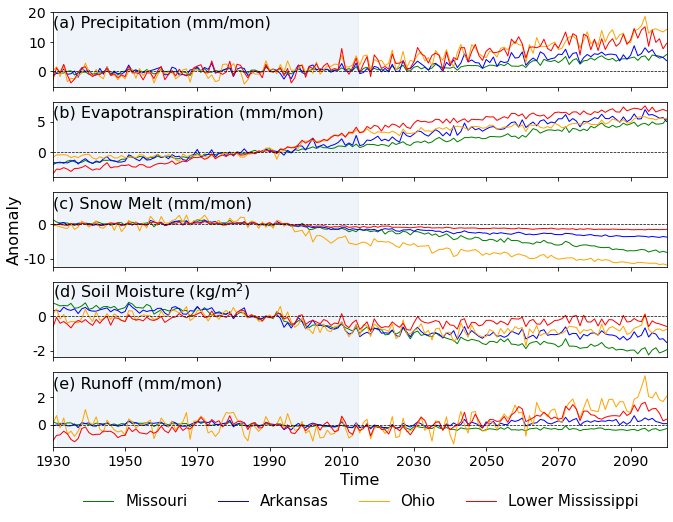

In [143]:
#%matplotlib notebook
# https://matplotlib.org/stable/tutorials/colors/colors.html

#fontSize = 14
#textFontVal = 16
#linewidth = 0.8


tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16

linewidth = 0.8
dashLinewidth = 0.7


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#fig = plt.figure(figsize=(15, 7), constrained_layout=False)
#fig = plt.figure(figsize=(11, 12), constrained_layout=False)
fig = plt.figure(figsize=(11, 8), constrained_layout=False)

#axs = [plt.subplot(4, 1, x + 1,) for x in range(4)]
axs = [plt.subplot(5, 1, x + 1,) for x in range(5)]

ax1 = axs[0]

#ln11=ax1.plot(range(171), param_masked_ensMean_basinAvg_YrAvgAnom_Missi, label="Mississippi", color = 'blue', linestyle='-', linewidth=1.0)
ln12=ax1.plot(range(171), param_masked_ensMean_basinAvg_YrAvgAnom_Missouri, label="Missouri", color = 'green', linestyle='-', linewidth=1.0)
ln13=ax1.plot(range(171), param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas, label="Arkansas", color = 'blue', linestyle='-', linewidth=1.0)
ln14=ax1.plot(range(171), param_masked_ensMean_basinAvg_YrAvgAnom_Ohio, label="Ohio", color = 'orange', linestyle='-', linewidth=1.0)
ln15=ax1.plot(range(171), param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=1.0)
#ln16=ax1.axhline(y = 0, color = 'k', label = 'Zero-line', linestyle='--', linewidth=0.7)
ln16=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ln17=ax1.axvspan(1, 84.5, color='C0',alpha=0.075)

#ax1.set_title('(a) Precipitation' )
#ax1.set_title('(a) Precipitation', y=0.98, pad=-14, fontsize = textFontVal)
#ax1.set_title('(a) Precipitation (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax1.set_title('(a) Precipitation (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
#ax1.set_xticklabels(timeTickLebels, minor=False)
ax1.set_xticklabels('', )

ax1.set_xlim([0, 170])

ax1.set_yticks([0, 10, 20]) 
ax1.set_yticklabels(['0', '10', '20'],  fontsize = tickFontSize) 

#ax1.axvline(x = 84.5, color = 'k', label = 'Divide', linestyle='--', linewidth=1.0)

#ax1.set_xlabel('Time (Year)')
#plt.ylabel('Discharge anomaly, $\mathregular{m^{3}}$/s')
#ax1.set_ylabel('Anomaly, mm/mon')
#ax1.legend(frameon=False,fontsize='large')

#plt.title('Historical discharge over Missouri basin at a selected time step (' + str(tsSel) +')' )
#plt.gcf().autofmt_xdate()

#+++++++++++++++++++++++++++++++++++++
ax2 = axs[1]
#ln21=ax2.plot(range(171), et_masked_ensMean_basinAvg_YrAvgAnom_Missi, label="Mississippi", color = 'blue', linestyle='-', linewidth=1.0)
ln22=ax2.plot(range(171), et_masked_ensMean_basinAvg_YrAvgAnom_Missouri, label="Missouri", color = 'green', linestyle='-', linewidth=1.0)
ln23=ax2.plot(range(171), et_masked_ensMean_basinAvg_YrAvgAnom_Arkansas, label="Arkansas", color = 'blue', linestyle='-', linewidth=1.0)
ln24=ax2.plot(range(171), et_masked_ensMean_basinAvg_YrAvgAnom_Ohio, label="Ohio", color = 'orange', linestyle='-', linewidth=1.0)
ln25=ax2.plot(range(171), et_masked_ensMean_basinAvg_YrAvgAnom_lowMissi, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=1.0)
ln26=ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln27=ax2.axvspan(1, 84.5, color='C0',alpha=0.075)

ax2.set_title('(b) Evapotranspiration (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_xticks(timeTicks)
#ax2.set_xticklabels(timeTickLebels, minor=False)
ax2.set_xticklabels('', )

ax2.set_xlim([0, 170])
#ax2.axvline(x = 84.5, color = 'k', label = 'Divide', linestyle='--', linewidth=1.0)

#ax2.set_xlabel('Time (Year)')
#ax2.set_ylabel('Discharge anomaly, $\mathregular{m^{3}}$/s')
#ax2.set_ylabel('Anomaly', loc='center', fontsize = textFontVal )
ax2.set_ylabel('Anomaly', fontsize = textFontSize )
#ax2.yaxis.set_label_coords(.9, -.1)

#ax2.yaxis.set_label_coords(-.03, -.6)
#ax4.yaxis.set_label_coords(-.05, 1.1)
ax2.yaxis.set_label_coords(-.05, -0.7)

ax2.set_yticks([0, 5]) 
ax2.set_yticklabels(['0', '5'],  fontsize = tickFontSize) 

#ax2.legend(frameon=False,fontsize='large')
#ax2.legend(ncol=1, loc=(+1.02, -0.58),frameon=True)


#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++
ax3 = axs[2]
#ln31=ax3.plot(range(171), snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missi, label="Mississippi", color = 'blue', linestyle='-', linewidth=1.0)
ln32=ax3.plot(range(171), snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Missouri, label="Missouri", color = 'green', linestyle='-', linewidth=1.0)
ln33=ax3.plot(range(171), snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Arkansas, label="Arkansas", color = 'blue', linestyle='-', linewidth=1.0)
ln34=ax3.plot(range(171), snowMelt_masked_ensMean_basinAvg_YrAvgAnom_Ohio, label="Ohio", color = 'orange', linestyle='-', linewidth=1.0)
ln35=ax3.plot(range(171), snowMelt_masked_ensMean_basinAvg_YrAvgAnom_lowMissi, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=1.0)
ln36=ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln37=ax3.axvspan(1, 84.5, color='C0',alpha=0.075)

ax3.set_title('(c) Snow Melt (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax3.set_xticks(timeTicks)
#ax3.set_xticklabels(timeTickLebels, minor=False)
ax3.set_xticklabels('', )

ax3.set_xlim([0, 170])
ax3.set_ylim([-12.5, 9.0])

ax3.set_yticks([-10, 0]) 
ax3.set_yticklabels(['-10', '0'],  fontsize = tickFontSize) 

#ax3.axvline(x = 84.5, color = 'k', label = 'Divide', linestyle='--', linewidth=1.0)

#ax3.set_xlabel('Time (Year)')
#ax3.set_ylabel('Discharge anomaly, $\mathregular{m^{3}}$/s')
#ax3.set_ylabel('Anomaly, mm/mon',)
#ax3.legend(frameon=False,fontsize='large')
#ax3.legend(ncol=1, loc=(+1.02, 0.1),frameon=True)
#ax3.legend(ncol=5, loc=(-0.05, -3.5),frameon=False, fontsize=legendFontSize)
ax3.legend(ncol=5, loc=(+0.04, -3.3),frameon=False, fontsize=legendFontSize)


#+++++++++++++++++++++++++++++++++++++
ax4 = axs[3]
#ln41=ax4.plot(range(171), soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missi, label="Mississippi", color = 'blue', linestyle='-', linewidth=1.0)
ln42=ax4.plot(range(171), soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Missouri, label="Missouri", color = 'green', linestyle='-', linewidth=1.0)
ln43=ax4.plot(range(171), soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Arkansas, label="Arkansas", color = 'blue', linestyle='-', linewidth=1.0)
ln44=ax4.plot(range(171), soilMoist_masked_ensMean_basinAvg_YrAvgAnom_Ohio, label="Ohio", color = 'orange', linestyle='-', linewidth=1.0)
ln45=ax4.plot(range(171), soilMoist_masked_ensMean_basinAvg_YrAvgAnom_lowMissi, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=1.0)
ln46=ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln47=ax4.axvspan(1, 84.5, color='C0',alpha=0.075)

ax4.set_title('(d) Soil Moisture (kg/$\mathregular{m^{2}}$)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax4.set_xticks(timeTicks)
#ax4.set_xticklabels(timeTickLebels, minor=False)
ax4.set_xticklabels('', )

ax4.set_xlim([0, 170])
ax4.set_ylim([-2.4, 2.0])

ax4.set_yticks([-2, 0]) 
ax4.set_yticklabels(['-2', '0'],  fontsize = tickFontSize) 

#ax4.axvline(x = 84.5, color = 'k', label = 'Divide', linestyle='--', linewidth=1.0)

#ax4.set_xlabel('Time (Year)')
#ax4.set_ylabel('Discharge anomaly, $\mathregular{m^{3}}$/s')
#ax4.set_ylabel('Anomaly, mm/mon',)
#ax4.legend(frameon=False,fontsize='large')

#+++++++++++++++++++++++++++++++++++++
ax5 = axs[4]
#ln51=ax5.plot(range(171), runoff_masked_ensMean_basinAvg_YrAvgAnom_Missi, label="Mississippi", color = 'blue', linestyle='-', linewidth=1.0)
ln52=ax5.plot(range(171), runoff_masked_ensMean_basinAvg_YrAvgAnom_Missouri, label="Missouri", color = 'green', linestyle='-', linewidth=1.0)
ln53=ax5.plot(range(171), runoff_masked_ensMean_basinAvg_YrAvgAnom_Arkansas, label="Arkansas", color = 'blue', linestyle='-', linewidth=1.0)
ln54=ax5.plot(range(171), runoff_masked_ensMean_basinAvg_YrAvgAnom_Ohio, label="Ohio", color = 'orange', linestyle='-', linewidth=1.0)
ln55=ax5.plot(range(171), runoff_masked_ensMean_basinAvg_YrAvgAnom_lowMissi, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=1.0)
ln56=ax5.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln57=ax5.axvspan(1, 84.5, color='C0',alpha=0.075)

ax5.set_title('(e) Runoff (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax5.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax5.set_xticks(timeTicks)
ax5.set_xticklabels(timeTickLebels, minor=False, rotation=0, fontsize=tickFontSize)
#ax5.set_xticklabels('', )

ax5.set_xlim([0, 170])

ax5.set_yticks([0, 2]) 
ax5.set_yticklabels(['0', '2'],  fontsize = tickFontSize) 

#ax5.axvline(x = 84.5, color = 'k', label = 'Divide', linestyle='--', linewidth=1.0)

ax5.set_xlabel('Time', fontsize = textFontSize)
#ax5.set_ylabel('Anomaly, mm/mon')
#ax5.legend(frameon=False,fontsize='large')

#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++
#st = fig.suptitle("Basin-average time series for different parameters", fontsize = 20)
#st.set_y(0.92)
#st.set_x(0.515)

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anom\paramAnnualAnom.pdf')  
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anom\paramAnnualAnom.png', dpi=600)  

plt.show()



## Groued Figure for the Box plot

In [144]:
width = 0.35  # the width of the bars

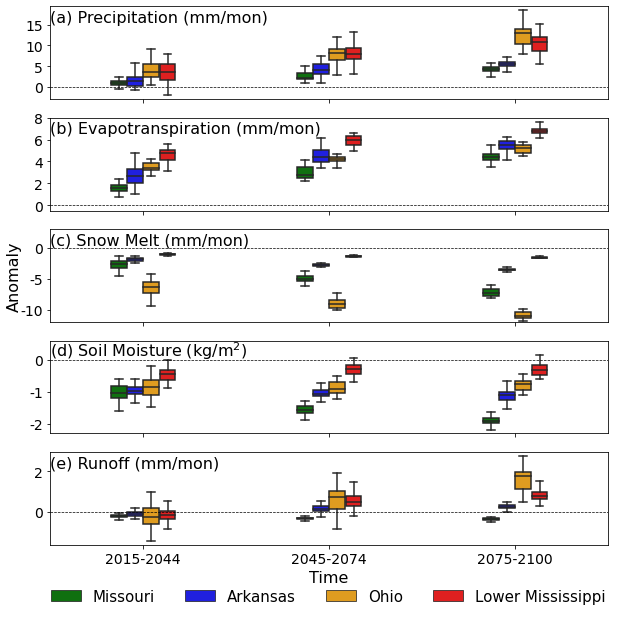

In [145]:
#%matplotlib notebook
# https://matplotlib.org/stable/tutorials/colors/colors.html

#fontSize = 14
#textFontVal = 16
#linewidth = 0.8

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16


my_colors = ["green", "blue", 
             "orange", "red"]

yrTickLebels = ['2015-2044', '2045-2074', '2075-2100']
sns.set_palette( my_colors )
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#fig = plt.figure(figsize=(15, 7), constrained_layout=False)
#fig = plt.figure(figsize=(12, 15), constrained_layout=False)
#fig = plt.figure(figsize=(10, 14), constrained_layout=False)
fig = plt.figure(figsize=(10, 11), constrained_layout=False)


#axs = [plt.subplot(4, 1, x + 1,) for x in range(4)]
axs = [plt.subplot(5, 1, x + 1,) for x in range(5)]

ax1 = axs[0]
#+++++++++++++++

ax1 = sns.boxplot(x="Years", y="Anomaly", ax=ax1, hue="Basins", data=mdfBasinsPrecipEras, width = width, showfliers = False) # RUN PLOT 
#ax1.axhline(y = 0, color = 'k', label = 'Zero-line', linestyle='--', linewidth=0.7)
ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

#ax1.legend(frameon=False,fontsize='large')
ax1.set_title('(a) Precipitation (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
#+++++++++++++++++++++++++++

#ax1.set_xticks(timeTicks)
ax1.set_xticklabels(yrTickLebels, minor=False)
ax1.set_xticklabels('', )
ax1.set_xlim([-0.5, 2.5])
ax1.set_ylim([-3, 19.5])

ax1.set_yticks([0, 5, 10, 15]) 
ax1.set_yticklabels(['0', '5', '10', '15'],  fontsize = tickFontSize) 

#ax1.set_xlabel('Time (Year)')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.get_legend().remove()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ax2 = sns.boxplot(x="Years", y="Anomaly", ax=ax2, hue="Basins", data=mdfBasinsEtEras, width = width, showfliers = False) # RUN PLOT 
ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

#ax2.legend(ncol=1, loc=(+1.02, -0.285),frameon=True)

ax2.set_title('(b) Evapotranspiration (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
#+++++++++++++++++++++++++++
#ax2.set_xticks(timeTicks)
ax2.set_xticklabels(yrTickLebels, minor=False)
ax2.set_xticklabels('', )
ax2.set_xlim([-0.5, 2.5])
ax2.set_ylim([-0.5, 8])

ax2.set_yticks([0, 2, 4, 6, 8]) 
ax2.set_yticklabels(['0', '2', '4', '6', '8'],  fontsize = tickFontSize) 


#ax2.set_xlabel('Time (Year)')
ax2.set_xlabel('')
ax2.set_ylabel('')

#ax2.set_ylabel('Anomaly', loc='center', )
ax2.yaxis.set_label_coords(-.05, .2)
ax2.get_legend().remove()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ax3 = sns.boxplot(x="Years", y="Anomaly", ax=ax3, hue="Basins", data=mdfBasinsSnowMeltEras, width = width, showfliers = False) # RUN PLOT 
#ax3.axhline(y = 0, color = 'k', label = 'Zero-anomaly', linestyle='--', linewidth=0.7)
ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

#ax3.legend(ncol=1, loc=(+1.02, -0.285),frameon=True)

ax3.set_title('(c) Snow Melt (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
#+++++++++++++++++++++++++++

#+++++++++++++++++++++++++++
#ax3.set_xticks(timeTicks)
ax3.set_xticklabels(yrTickLebels, minor=False)
ax3.set_xticklabels('', )
ax3.set_xlim([-0.5, 2.5])
ax3.set_ylim([-12, 3])

ax3.set_yticks([-10, -5, 0]) 
ax3.set_yticklabels(['-10', '-5', '0'],  fontsize = tickFontSize) 


#ax3.set_xlabel('Time (Year)')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.get_legend().remove()
ax3.set_ylabel('Anomaly', loc='center', fontsize = textFontSize)
ax3.yaxis.set_label_coords(-0.05, +0.5)

#ax3.legend(ncol=1, loc=(+1.02, 0.15),frameon=True)
#ax3.legend(ncol=5, loc=(-0.05, -3.5),frameon=False, fontsize=fontSize)
ax3.legend(ncol=4, loc=(-0.01, -3.1),frameon=False, fontsize=legendFontSize )

# replace labels
leg = ax3.axes.get_legend()

new_labels = ['Missouri', 'Arkansas', 'Ohio', 'Lower Mississippi']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    
    
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
ax4 = sns.boxplot(x="Years", y="Anomaly", ax=ax4, hue="Basins", data=mdfBasinsSoilMoistEras, width = width, showfliers = False) # RUN PLOT 
ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

#ax4.legend(ncol=1, loc=(+1.02, -0.285),frameon=True)

ax4.set_title('(d) Soil Moisture (kg/$\mathregular{m^{2}}$)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

#+++++++++++++++++++++++++++

#+++++++++++++++++++++++++++
#ax4.set_xticks(timeTicks)
ax4.set_xticklabels(yrTickLebels, minor=False)
ax4.set_xticklabels('', )
ax4.set_xlim([-0.5, 2.5])
ax4.set_ylim([-2.3, 0.6])

ax4.set_yticks([-2, -1, 0]) 
ax4.set_yticklabels(['-2', '-1', '0'],  fontsize = tickFontSize) 

#ax4.set_xlabel('Time (Year)')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.get_legend().remove()
#ax4.set_ylabel('Anomaly, mm/mon', loc='top')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax5 = axs[4]
ax5 = sns.boxplot(x="Years", y="Anomaly", ax=ax5, hue="Basins", data=mdfBasinsRunoffEras, width = width, showfliers = False) # RUN PLOT 
ax5.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

#ax5.legend(ncol=1, loc=(+1.02, -0.285),frameon=True)
#ax5.legend(ncol=1, loc=(+1.02, -0.255),frameon=True)
#ax5.legend(ncol=1, loc=(+1.05, -0.26),frameon=True)
#ax5.legend(ncol=1, loc=(+1.05, -0.26),frameon=True, labels=['Missouri', 'Arkansas', 'Ohio', 'Lower Mississippi'])


ax5.set_title('(e) Runoff (mm/mon)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
#+++++++++++++++++++++++++++
#ax5.set_xticks(timeTicks)
ax5.set_xticklabels(yrTickLebels, fontsize = tickFontSize)
#ax5.set_xticklabels('', )
ax5.set_xlim([-0.5, 2.5])

ax5.set_yticks([0, 2]) 
ax5.set_yticklabels(['0', '2'],  fontsize = tickFontSize) 


ax5.set_xlabel('Time', fontsize = textFontSize)
#ax5.set_xlabel('')
ax5.set_ylabel('')

ax5.get_legend().remove()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#st = fig.suptitle("Basin-average anomaly for different parameters", fontsize = 20)
#st.set_y(0.905)

#st.set_x(0.515)
plt.subplots_adjust(bottom=0.2)



#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anom\anomParamBox.pdf')  
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anom\anomParamBox.png', dpi=600)  



plt.show()


## Extract the statistics for different Eras for Snowmelt

In [146]:
print(param_masked_ensMean_basinAvg_YrAvgAnom_Missouri.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_Ohio.shape)
print(param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)


### Missouri

In [147]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri = param_masked_ensMean_basinAvg_YrAvgAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri.shape)


(30,)
(30,)
(26,)


### Arkansas

In [148]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas = param_masked_ensMean_basinAvg_YrAvgAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas.shape)


(30,)
(30,)
(26,)


### Ohio

In [149]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio = param_masked_ensMean_basinAvg_YrAvgAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio.shape)


(30,)
(30,)
(26,)


### Lower Mississippi

In [150]:
param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi = param_masked_ensMean_basinAvg_YrAvgAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi.shape)


(30,)
(30,)
(26,)


## Picking the max and min only

### Missouri

In [151]:
param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Missouri)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Missouri)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Missouri)
print('')

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Missouri)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Missouri)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Missouri)



2.3347659158639473
4.970816765969644
5.630694145382748

-0.5713455532083813
0.9145216904700817
2.3541188576959726


### Arkansas

In [152]:
param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Arkansas)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Arkansas)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Arkansas)
print('')

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Arkansas)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Arkansas)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Arkansas)



5.853725040595279
7.431091413813803
8.628792548792575

-0.9012480005694385
0.9308322431174787
2.6565995257730037


### Ohio

In [153]:
param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_Ohio)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_Ohio)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_Ohio)
print('')

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_Ohio)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_Ohio)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_Ohio)




9.081876226203406
11.969996323763297
18.655790213146034

0.36491195583789704
2.7669128932107583
7.99738325391678


### Lower Mississippi

In [154]:
param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraOne_lowMissi)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraTwo_lowMissi)

param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_max_eraThree_lowMissi)
print('')

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraOne_lowMissi)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraTwo_lowMissi)

param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgAnom_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgAnom_min_eraThree_lowMissi)




8.045370845240868
13.314687509827465
15.118357957993226

-1.9040179755342734
3.06783390770822
5.447938257533735


## Percent difference calculation

## First: "param" refers to "precip"

In [155]:

param_masked_ensMean_basinAvg_YrAvgPercCh_Missouri = (param_masked_ensMean_basinAvg_YrAvg_Missouri - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Missouri*100
print(param_masked_ensMean_basinAvg_YrAvgPercCh_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_Arkansas = (param_masked_ensMean_basinAvg_YrAvg_Arkansas - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Arkansas*100
print(param_masked_ensMean_basinAvg_YrAvgPercCh_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_Ohio = (param_masked_ensMean_basinAvg_YrAvg_Ohio - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_Ohio*100
print(param_masked_ensMean_basinAvg_YrAvgPercCh_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_lowMissi = (param_masked_ensMean_basinAvg_YrAvg_lowMissi - param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi)/param_refPeriodMean_masked_ensMean_basinAvg_YrAvg_lowMissi*100
print(param_masked_ensMean_basinAvg_YrAvgPercCh_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)


## Splitting into Eras

In [156]:
param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri = param_masked_ensMean_basinAvg_YrAvgPercCh_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri = param_masked_ensMean_basinAvg_YrAvgPercCh_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri = param_masked_ensMean_basinAvg_YrAvgPercCh_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri.shape)


(30,)
(30,)
(26,)


In [157]:
param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas = param_masked_ensMean_basinAvg_YrAvgPercCh_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas = param_masked_ensMean_basinAvg_YrAvgPercCh_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas = param_masked_ensMean_basinAvg_YrAvgPercCh_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas.shape)


(30,)
(30,)
(26,)


In [158]:
param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio = param_masked_ensMean_basinAvg_YrAvgPercCh_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio = param_masked_ensMean_basinAvg_YrAvgPercCh_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio = param_masked_ensMean_basinAvg_YrAvgPercCh_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio.shape)


(30,)
(30,)
(26,)


In [159]:
param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi = param_masked_ensMean_basinAvg_YrAvgPercCh_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi = param_masked_ensMean_basinAvg_YrAvgPercCh_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi.shape)

param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi = param_masked_ensMean_basinAvg_YrAvgPercCh_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi.shape)


(30,)
(30,)
(26,)


## Pick Statistics

In [160]:
print(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri.shape)


(30,)


## Missouri

In [161]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Missouri = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Missouri = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Missouri)



5.718704823882128
-1.399436469855837
2.263878480636128
2.4747952356577523


In [162]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Missouri = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Missouri = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Missouri)



12.175367828113032
2.240001692375593
6.041504702467844
5.021903638476164


In [163]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Missouri = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Missouri = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Missouri = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Missouri)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Missouri = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Missouri)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Missouri)




13.79165146801876
5.766107332655757
10.548878535334426
10.539944841492735


## Arkansas

In [164]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Arkansas = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Arkansas = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Arkansas)



10.64570135164737
-1.6390276262200183
2.685850301406091
2.4622523256297666


In [165]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Arkansas = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Arkansas = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Arkansas)


13.514331363300244
1.6928301209899312
7.60188635947822
7.427715583270784


In [166]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Arkansas = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Arkansas = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Arkansas = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Arkansas)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Arkansas = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Arkansas)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Arkansas)


15.6924945846832
4.83134499249241
9.978417890795592
10.045822457375564


## Ohio

In [167]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Ohio = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Ohio = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_Ohio)


8.601605064658758
0.3456145458615159
3.894376645350215
3.4889006607998336


In [168]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Ohio = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Ohio = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_Ohio)


11.336994519410121
2.62059197493166
7.453144104864746
7.814408717789156


In [169]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Ohio = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Ohio = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Ohio = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_Ohio)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Ohio = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_Ohio)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_Ohio)



17.669227765911877
7.574462653700453
11.742777429642825
12.243469517767299


## Lower Mississippi

In [170]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraOne_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraOne_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_lowMissi = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraOne_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_lowMissi = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraOne_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraOne_lowMissi)


8.275122598170634
-1.95839103998382
3.7246342647676816
3.731837570068727


In [171]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraTwo_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraTwo_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_lowMissi = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraTwo_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_lowMissi = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraTwo_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraTwo_lowMissi)


13.694915202737915
3.155442077866129
8.27081479563896
8.121588589989631


In [172]:
param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_lowMissi = np.nanmax(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_max_eraThree_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_lowMissi = np.nanmin(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_min_eraThree_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_lowMissi = np.nanmean(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_mean_eraThree_lowMissi)

param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_lowMissi = np.nanmedian(param_masked_ensMean_basinAvg_YrAvgPercCh_eraThree_lowMissi)
print(param_masked_ensMean_basinAvg_YrAvgPercCh_median_eraThree_lowMissi)


15.55009308979555
5.603515096513374
10.740672030822962
11.045540699209527


In [173]:
STOP here ===================

SyntaxError: invalid syntax (<ipython-input-173-f3db6e1961f9>, line 1)